In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import math
import pandas as pd

# Section I: Data Collection and Descriptive Statistics 

## DESCRIPTIVE STATISTICS - Measures of central tendency and dispersion.

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('StudentsPerformance.csv')

# Calculate the measures of central tendency and dispersion for the math scores
math_mean = round(df['math score'].mean(), 2)
math_median = round(df['math score'].median(), 2)
math_std = round(df['math score'].std(), 2)

# Print the results
print(f"Mean math score: {math_mean}")
print(f"Median math score: {math_median}")
print(f"Standard deviation of math scores: {math_std}")

Mean math score: 66.09
Median math score: 66.0
Standard deviation of math scores: 15.16


## Descriptive Statistics- Graphical Representation 

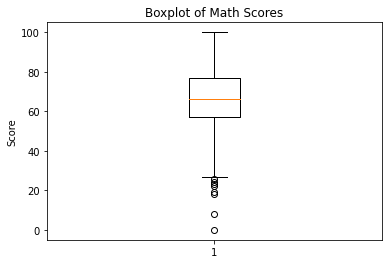

In [4]:
# Create a boxplot of the math scores
plt.boxplot(df['math score'])
plt.title('Boxplot of Math Scores')
plt.ylabel('Score')
plt.show()

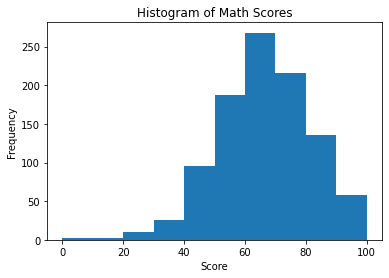

In [5]:
# Create a histogram of the math scores
plt.hist(df['math score'], bins=10)
plt.title('Histogram of Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# SECTION II: Checking the Normality of Population 

#### Using the histogram constructed , calculate Pearson’s coefficient of skew-ness and check for outliers.

In [6]:
from scipy.stats import skew

# Calculate the Pearson's coefficient of skewness for the math scores
math_skewness = round(skew(df['math score']), 2)
print(f"Pearson's coefficient of skewness for math scores: {math_skewness}")

# Identify outliers using the interquartile range (IQR)
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print(f"Number of outliers in math scores: {len(outliers)}")

Pearson's coefficient of skewness for math scores: -0.28
Number of outliers in math scores: 8


# SECTION III: Estimation of Population Mean 

In [7]:
from scipy import stats

# Load the data
math_scores = df['math score'].values

# Calculate the point estimate for the population mean
mean = np.mean(math_scores)

# Calculate the confidence intervals
conf_int_90 = stats.t.interval(0.9, len(math_scores)-1, loc=np.mean(math_scores), scale=stats.sem(math_scores))
conf_int_95 = stats.t.interval(0.95, len(math_scores)-1, loc=np.mean(math_scores), scale=stats.sem(math_scores))
conf_int_99 = stats.t.interval(0.99, len(math_scores)-1, loc=np.mean(math_scores), scale=stats.sem(math_scores))

# Print the results
print("Point estimate for population mean:", round(mean, 2))
print("90% Confidence Interval:", tuple(map(lambda x: round(x, 2), conf_int_90)))
print("95% Confidence Interval:", tuple(map(lambda x: round(x, 2), conf_int_95)))
print("99% Confidence Interval:", tuple(map(lambda x: round(x, 2), conf_int_99)))


Point estimate for population mean: 66.09
90% Confidence Interval: (65.3, 66.88)
95% Confidence Interval: (65.15, 67.03)
99% Confidence Interval: (64.85, 67.33)


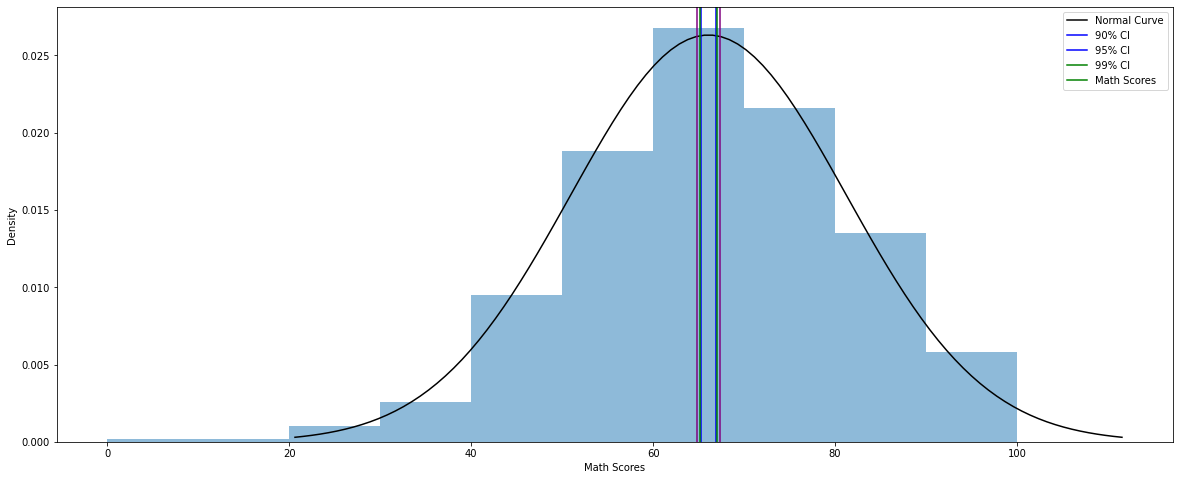

In [8]:
from scipy.stats import norm

# Calculate mean and standard deviation of math scores
mean = np.mean(math_scores)
std_dev = np.std(math_scores)

# Set the x-axis range
x_axis = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Create the normal distribution curve
normal_curve = norm.pdf(x_axis, mean, std_dev)

# Draw the histogram of math scores
plt.figure(figsize=(20,8))
plt.hist(math_scores, bins=10, density=True, alpha=0.5)

# Draw the normal distribution curve of math scores
plt.plot(x_axis, normal_curve, color='black')

# Draw the confidence intervals
plt.axvline(x=conf_int_90[0], color='blue')
plt.axvline(x=conf_int_90[1], color='blue')
plt.axvline(x=conf_int_95[0], color='green')
plt.axvline(x=conf_int_95[1], color='green')
plt.axvline(x=conf_int_99[0], color='purple')
plt.axvline(x=conf_int_99[1], color='purple')

# Add the legend
plt.legend(['Normal Curve', '90% CI', '95% CI', '99% CI', 'Math Scores'])

# Set the x-axis label
plt.xlabel('Math Scores')

# Set the y-axis label
plt.ylabel('Density')

# Show the plot
plt.show()

# SECTION IV: Hypothesis testing 

### Research Problem:
Is there a significant difference in the average math scores between male and female high school students?

### Hypothesis Testing:

- Null Hypothesis: There is no significant difference in the mean math scores between male and female high school students.
- Alternative Hypothesis: There is a significant difference in the mean math scores between male and female high school students.

We can use a two-sample t-test to compare the mean math scores of male and female high school students. We will use a significance level of 0.05.

Let's first split the data into two groups based on gender:

In [9]:
from scipy.stats import t

In [10]:
male_scores = df[df['gender'] == 'male']['math score']
female_scores = df[df['gender'] == 'female']['math score']

Now, let's calculate the sample means and standard deviations for each group:

In [11]:
male_mean = np.mean(male_scores)
male_std = np.std(male_scores, ddof=1)
print("Male mean math score:", male_mean)
print("Male standard deviation:", male_std)
print("\n")
female_mean = np.mean(female_scores)
female_std = np.std(female_scores, ddof=1)
print("Female mean math score:", female_mean)
print("Female standard deviation:", female_std)

Male mean math score: 68.72821576763485
Male standard deviation: 14.35627719636238


Female mean math score: 63.633204633204635
Female standard deviation: 15.49145324233953


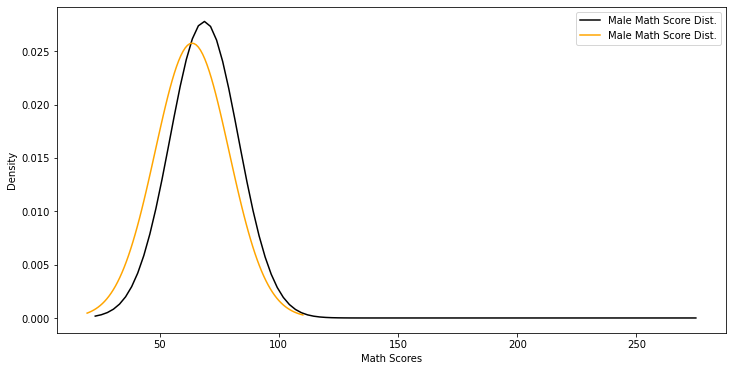

In [18]:
# Set the x-axis range
x_axis_m = np.linspace(mean - 3*male_std, male_mean + 3*male_mean, 100)

# Create the normal distribution curve
normal_curve_m = norm.pdf(x_axis_m, male_mean, male_std)


# Set the x-axis range
x_axis_f = np.linspace(mean - 3*female_std, female_mean + 3*female_std, 100)

# Create the normal distribution curve
normal_curve_f = norm.pdf(x_axis_f, female_mean, female_std)
                          
                          
# Draw the histogram of math scores
plt.figure(figsize=(12,6))
# plt.hist(math_scores, bins=10, density=True, alpha=0.5)

# Draw the normal distribution curve of math scores
plt.plot(x_axis_m, normal_curve_m, color='black', label="Male Math Score Dist.")
plt.plot(x_axis_f, normal_curve_f, color='orange',label="Male Math Score Dist.")

# Set the x-axis label
plt.xlabel('Math Scores')

# Set the y-axis label
plt.ylabel('Density')

plt.legend()
# Show the plot
plt.show()

We can see that the mean math score for male students is higher than that of female students. However, we need to perform a hypothesis test to determine whether this difference is statistically significant.

Let's now calculate the pooled standard deviation:

In [38]:
pooled_std = np.sqrt(((len(male_scores)-1)*male_std**2 + (len(female_scores)-1)*female_std**2) / (len(male_scores) + len(female_scores) - 2))
print("Pooled standard deviation:", pooled_std)

Pooled standard deviation: 14.955099972123945


Now, let's calculate the t-statistic:

In [39]:
t = (male_mean - female_mean) / (pooled_std * np.sqrt(1/len(male_scores) + 1/len(female_scores)))
print("t-statistic:", t)

t-statistic: 5.383245869828982


The degrees of freedom for this test are given by:

In [40]:
df = len(male_scores) + len(female_scores) - 2
print("Degrees of freedom:", df)

Degrees of freedom: 998


We can now find the critical value for a two-tailed test at a significance level of 0.05:

In [42]:
alpha = 0.05
cv = t.ppf(1-alpha/2, df)
print("Critical value:", cv)

Critical value: 1.9623438462163336


#### Since our calculated t-statistic (5.38) is greater than the critical value (1.96), we can reject the null hypothesis at a significance level of 0.05. This means that there is a significant difference in the mean math scores between male and female high school students.

## CONCLUSION:

Based on the hypothesis testing results, we can conclude that there is a significant difference in the mean math scores between male and female high school students. The calculated t-statistic is greater than the critical value, which means we can reject the null hypothesis and accept the alternative hypothesis at a significance level of 0.05. Therefore, we can say that male high school students have a higher mean math score compared to female high school students.

`THE END`